In [64]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [ ]:
BASE_DIR = Path.cwd().parent
# print(BASE_DIR)
Dataset_dir = "Datasets/rossman_sales_data"

In [23]:
df = pd.read_csv(f"{BASE_DIR}/{Dataset_dir}/train.csv")
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## StateHoliday

In [28]:
df[['StateHoliday']].value_counts().reset_index()

,StateHoliday,count
0,0,855087
1,0,131072
2,a,20260
3,b,6690
4,c,4100


In [30]:
df['StateHoliday'] = df['StateHoliday'].isin(['a','b','c']).astype(int)

In [31]:
df[['StateHoliday']].value_counts().reset_index()

,StateHoliday,count
0,0,986159
1,1,31050


## Stores

In [34]:
df[['Store']].value_counts().reset_index()

,Store,count
0,1115,942
1,1,942
2,2,942
3,3,942
4,4,942
...,...,...
1110,32,758
1111,36,758
1112,41,758
1113,1092,758


In [39]:
df_subset = df[df.Store.isin(df.Store.sample(10,random_state=1502))].copy()

In [40]:
df_subset['Store'].value_counts()

Store
24     942
47     942
156    942
264    942
267    942
353    942
763    942
794    942
862    942
864    942
Name: count, dtype: int64

In [42]:
df_subset.groupby('Store')['Sales'].mean().sort_values(ascending=False)

Store
24     7763.773885
267    7731.106157
862    7128.519108
47     5946.666667
264    5851.901274
156    5779.171975
353    5579.376858
763    5097.873673
864    3520.780255
794    2553.475584
Name: Sales, dtype: float64

In [44]:
df_subset.groupby('Store')['Sales'].idxmax().sort_values(ascending=False)


Store
864    947828
862    627821
156    627115
763    619917
264    455513
24     408443
794    245456
267    245014
353    101817
47      34611
Name: Sales, dtype: int64

In [45]:
df_subset.index = pd.to_datetime(df_subset['Date'])
df_subset.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=9420, freq=None)

<Axes: xlabel='Date'>

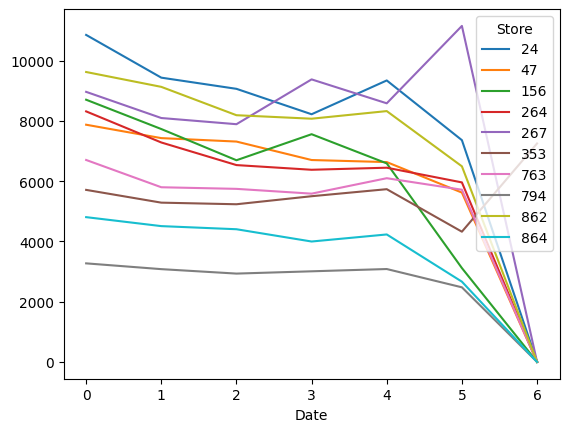

In [51]:
df_subset.groupby([df_subset.index.dayofweek,'Store'])['Sales'].mean().unstack().plot()

In [52]:
def standardize_sales(series):
    return (series - series.mean()) /series.std()

In [57]:
df_subset.loc[:,"sales_standardized"] = df_subset.groupby('Store')['Sales'].transform(standardize_sales)

In [58]:
df_subset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sales_standardized
Date,,,,,,,,,,
2015-07-31,24,5,2015-07-31,14190,1082,1,1,0,1,1.504863
2015-07-31,47,5,2015-07-31,9379,1021,1,1,0,1,1.103818
2015-07-31,156,5,2015-07-31,8828,821,1,1,0,1,0.832283
2015-07-31,264,5,2015-07-31,8303,992,1,1,0,1,0.697361
2015-07-31,267,5,2015-07-31,11326,1217,1,1,0,1,0.853360


<Axes: xlabel='DayOfWeek'>

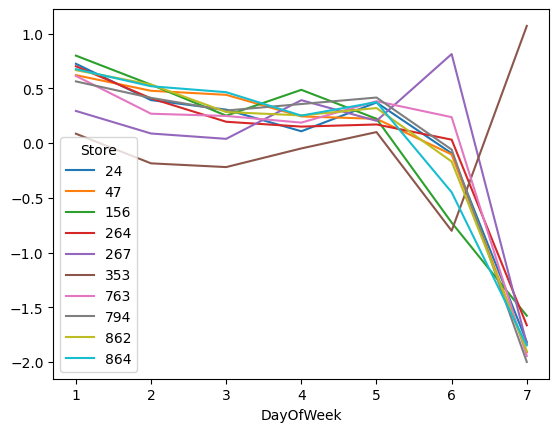

In [61]:
df_subset.groupby(['DayOfWeek','Store'])['sales_standardized'].mean().unstack().plot()

In [62]:
df_subset_day7 = df_subset[df_subset['DayOfWeek'] == 7].copy()
df_subset_day7.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sales_standardized
Date,,,,,,,,,,
2015-07-26,24,7,2015-07-26,0,0,0,0,0,0,-1.818083
2015-07-26,47,7,2015-07-26,0,0,0,0,0,0,-1.912412
2015-07-26,156,7,2015-07-26,0,0,0,0,0,0,-1.577624
2015-07-26,264,7,2015-07-26,0,0,0,0,0,0,-1.664922
2015-07-26,267,7,2015-07-26,0,0,0,0,0,0,-1.835219


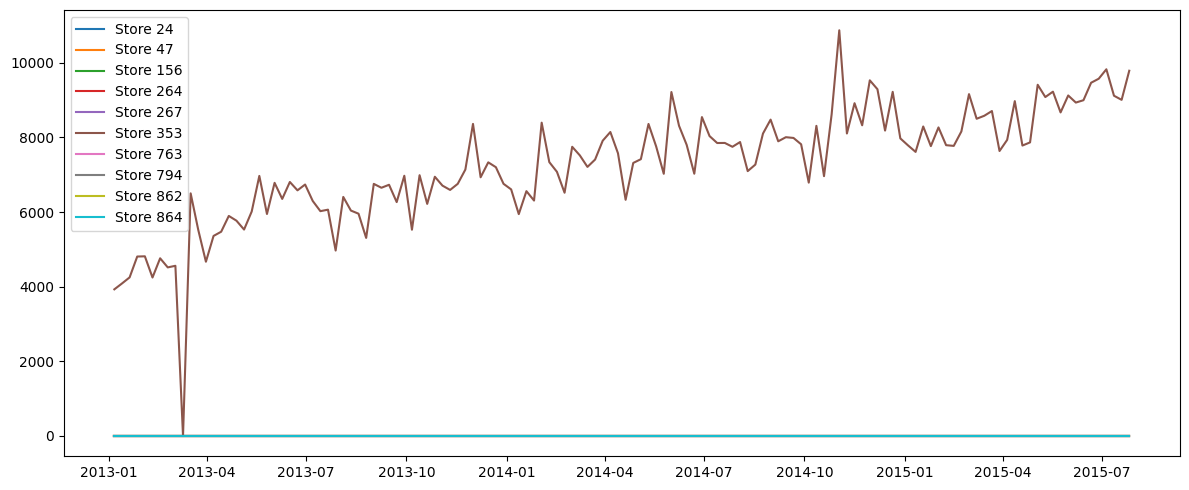

In [ ]:
fig = plt.figure(figsize= (12,5))

for store,data in df_subset_day7.groupby('Store'):
    plt.plot(data.index, data.Sales, label = f"Store {store}")
    plt.legend()
plt.tight_layout()
plt.show()


In [71]:
df_subset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'sales_standardized'],
      dtype='object')

In [72]:
df_clean = df_subset[(df_subset['Store']!=353) & (df_subset['DayOfWeek']!=7)].drop(columns=['sales_standardized'])

df_clean.loc[:,"sales_standarized"] = df_clean.groupby('Store')['Sales'].transform(standardize_sales)
df_clean.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sales_standarized
Date,,,,,,,,,,
2015-07-31,24,5,2015-07-31,14190,1082,1,1,0,1,1.658935
2015-07-31,47,5,2015-07-31,9379,1021,1,1,0,1,1.162338
2015-07-31,156,5,2015-07-31,8828,821,1,1,0,1,0.689866
2015-07-31,264,5,2015-07-31,8303,992,1,1,0,1,0.530960
2015-07-31,267,5,2015-07-31,11326,1217,1,1,0,1,0.765726


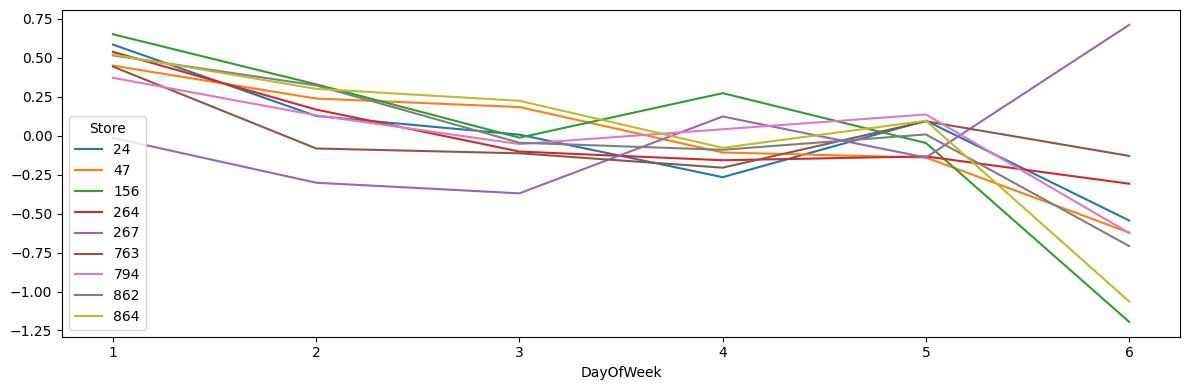

In [82]:
fig,ax = plt.subplots(figsize=(12,4))
df_clean.groupby(['DayOfWeek','Store'])['sales_standarized'].mean().unstack().plot(ax=ax)
plt.tight_layout()
plt.show()